In [1]:
# import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('covid_19_case_data\Indonesia_coronavirus_daily_data.csv')
columns = np.array(['Date', 'Viloyat', 'Kunlik aniqlanganlar', 'Kunlik ulganlar', 'Kunlik tuzalganlar', 'Kunlik faol holat', 'Jami aniqlanganlar', 'Jami tuzalganlar', 'Jami ulganlar', 'Jami faol holat'], dtype='object')

data.columns = columns
data['Date'] = pd.to_datetime(arg=data['Date'], format="%Y-%m-%d")
data = data.set_index(keys=['Viloyat', 'Date']).sort_index(ascending=False)
data.head()

Kunlik aniqlanganlar  Kunlik ulganlar  \
Viloyat        Date                                                
SUMATERA UTARA 2021-08-20                     2                0   
               2021-08-19                     0                7   
               2021-08-18                   869               49   
               2021-08-17                  1172               11   
               2021-08-16                   821               33   

                           Kunlik tuzalganlar  Kunlik faol holat  \
Viloyat        Date                                                
SUMATERA UTARA 2021-08-20                   0                  2   
               2021-08-19                 153               -160   
               2021-08-18                1502               -682   
               2021-08-17                1076                 85   
               2021-08-16                 950               -162   

                           Jami aniqlanganlar  Jami tuzalganlar  \
Viloyat        Date                                               
SUMATERA UTARA 2021-08-20               84273             54797   
               2021-08-19               84271             54797   
               2021-08-18               84271             54644   
               2021-08-17               83402             53142   
               2021-08-16               82230             52066   

                           Jami ulganlar  Jami faol holat  
Viloyat        Date                                        
SUMATERA UTARA 2021-08-20           2010            27466  
               2021-08-19           2010            27464  
               2021-08-18           2003            27624  
               2021-08-17           1954            28306  
               2021-08-16           1943            28221

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17613 entries, ('SUMATERA UTARA', Timestamp('2021-08-20 00:00:00')) to ('ACEH', Timestamp('2020-03-26 00:00:00'))
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Kunlik aniqlanganlar  17613 non-null  int64
 1   Kunlik ulganlar       17613 non-null  int64
 2   Kunlik tuzalganlar    17613 non-null  int64
 3   Kunlik faol holat     17613 non-null  int64
 4   Jami aniqlanganlar    17613 non-null  int64
 5   Jami tuzalganlar      17613 non-null  int64
 6   Jami ulganlar         17613 non-null  int64
 7   Jami faol holat       17613 non-null  int64
dtypes: int64(8)
memory usage: 1.1+ MB


In [4]:
data.columns

Index(['Kunlik aniqlanganlar', 'Kunlik ulganlar', 'Kunlik tuzalganlar',
       'Kunlik faol holat', 'Jami aniqlanganlar', 'Jami tuzalganlar',
       'Jami ulganlar', 'Jami faol holat'],
      dtype='object')

In [5]:
type(data.index[0][1])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
# df.xs() => dan foydalanamiz
# data.loc[('JAWA TIMUR', '2020-01-08')] => bu orqali index ni ikkinchi argumenti orqali filter qilib bo'lmaydi
data.xs(key='SUMATERA UTARA', level=0).head()

,Kunlik aniqlanganlar,Kunlik ulganlar,Kunlik tuzalganlar,Kunlik faol holat,Jami aniqlanganlar,Jami tuzalganlar,Jami ulganlar,Jami faol holat
Date,,,,,,,,
2021-08-20,2,0,0,2,84273,54797,2010,27466
2021-08-19,0,7,153,-160,84271,54797,2010,27464
2021-08-18,869,49,1502,-682,84271,54644,2003,27624
2021-08-17,1172,11,1076,85,83402,53142,1954,28306
2021-08-16,821,33,950,-162,82230,52066,1943,28221


In [7]:
data.loc['SUMATERA UTARA']

,Kunlik aniqlanganlar,Kunlik ulganlar,Kunlik tuzalganlar,Kunlik faol holat,Jami aniqlanganlar,Jami tuzalganlar,Jami ulganlar,Jami faol holat
Date,,,,,,,,
2021-08-20,2,0,0,2,84273,54797,2010,27466
2021-08-19,0,7,153,-160,84271,54797,2010,27464
2021-08-18,869,49,1502,-682,84271,54644,2003,27624
2021-08-17,1172,11,1076,85,83402,53142,1954,28306
2021-08-16,821,33,950,-162,82230,52066,1943,28221
...,...,...,...,...,...,...,...,...
2020-03-21,0,0,0,0,1,0,1,0
2020-03-20,0,0,0,0,1,0,1,0
2020-03-19,0,0,0,0,1,0,1,0


kiritilgan shaharning eng oxirgi kundagi statikasi bo'laklar qiyosida

In [8]:
data.head()

Kunlik aniqlanganlar  Kunlik ulganlar  \
Viloyat        Date                                                
SUMATERA UTARA 2021-08-20                     2                0   
               2021-08-19                     0                7   
               2021-08-18                   869               49   
               2021-08-17                  1172               11   
               2021-08-16                   821               33   

                           Kunlik tuzalganlar  Kunlik faol holat  \
Viloyat        Date                                                
SUMATERA UTARA 2021-08-20                   0                  2   
               2021-08-19                 153               -160   
               2021-08-18                1502               -682   
               2021-08-17                1076                 85   
               2021-08-16                 950               -162   

                           Jami aniqlanganlar  Jami tuzalganlar  \
Viloyat        Date                                               
SUMATERA UTARA 2021-08-20               84273             54797   
               2021-08-19               84271             54797   
               2021-08-18               84271             54644   
               2021-08-17               83402             53142   
               2021-08-16               82230             52066   

                           Jami ulganlar  Jami faol holat  
Viloyat        Date                                        
SUMATERA UTARA 2021-08-20           2010            27466  
               2021-08-19           2010            27464  
               2021-08-18           2003            27624  
               2021-08-17           1954            28306  
               2021-08-16           1943            28221

In [9]:
def get_date_of_province(province_name: str):
    """ return Series object """
    return data.loc[province_name]

In [10]:
a = get_date_of_province(province_name='SUMATERA UTARA').iloc[0]
a.index.name='SUMATERA UTARA'
a.name.strftime("%Y-%m-%d")

'2021-08-20'

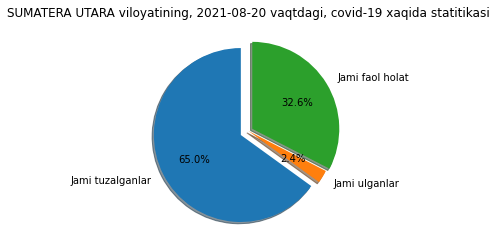

In [11]:
names=['Jami tuzalganlar','Jami ulganlar', 'Jami faol holat']
explode = (0.1, 0, 0.05)
title = f"{a.index.name} viloyatining, {a.name.strftime('%Y-%m-%d')} vaqtdagi, covid-19 xaqida statitikasi"

plt.title(title)
plt.pie(a[names], labels=names, labeldistance=1.15, explode=explode, startangle=90, shadow=True, autopct='%1.1f%%')
plt.show()

scatterplot tarqoqlik grafigi

In [12]:
a = get_date_of_province(province_name='SUMATERA UTARA')
a

SUMATERA UTARA,Kunlik aniqlanganlar,Kunlik ulganlar,Kunlik tuzalganlar,Kunlik faol holat,Jami aniqlanganlar,Jami tuzalganlar,Jami ulganlar,Jami faol holat
Date,,,,,,,,
2021-08-20,2,0,0,2,84273,54797,2010,27466
2021-08-19,0,7,153,-160,84271,54797,2010,27464
2021-08-18,869,49,1502,-682,84271,54644,2003,27624
2021-08-17,1172,11,1076,85,83402,53142,1954,28306
2021-08-16,821,33,950,-162,82230,52066,1943,28221
...,...,...,...,...,...,...,...,...
2020-03-21,0,0,0,0,1,0,1,0
2020-03-20,0,0,0,0,1,0,1,0
2020-03-19,0,0,0,0,1,0,1,0


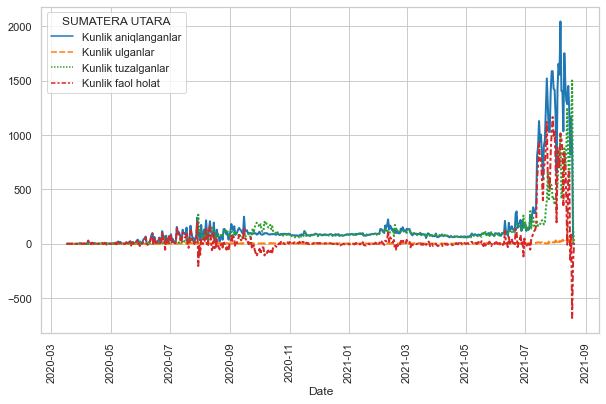

In [13]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.lineplot(data=a[['Kunlik aniqlanganlar', 'Kunlik ulganlar', 'Kunlik tuzalganlar','Kunlik faol holat']], palette="tab10", linewidth=2)
plt.xticks(rotation=90)
plt.show()